### All don't run cells are data cleaning and file merging, which are time consuming and will cause logical error if ran again

In [1]:
%matplotlib inline
import nltk
import sklearn
import keras
import pandas as pd
import numpy as np 
import warnings 
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve
import matplotlib.pyplot as plt
import glob
import os
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import inflect
import re, string, unicodedata
from bs4 import BeautifulSoup
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
import pickle
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from string import punctuation 
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Using TensorFlow backend.


### Merging troll tweets; don't run if already merged

In [0]:
os.chdir("C:\\Users\\afy36\\Desktop\\cmps 287\\project\\troll_raw")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "merged_tweets.csv", index=False, encoding='utf-8-sig')

### Getting english tweets and removing unnecessary columns (don't run if only content and label header)

In [0]:
#dropping unnecessary info to reduce size
data = pd.read_csv('C:\\Users\\afy36\\Desktop\\cmps 287\\project\\merged_tweets.csv', encoding='iso-8859-1')
new_clean = data.drop(data.loc[:, 'region':'tco3_step1'].columns, axis = 1)
# getting the english tweets only
l = data["language"]== "English" 
new_clean = new_clean[l]
new_clean.to_csv (r'russian_tweets.csv', index = False, header=True)

### Fixing file format for later merge with non-troll data (don't run if correct format)

In [0]:
data = pd.read_csv('C:\\Users\\afy36\\Desktop\\cmps 287\\project\\russian_tweets.csv', encoding='iso-8859-1')
new_clean_file = data.drop(data.loc[:, 'external_author_id':'author'].columns, axis = 1)
new_clean_file

In [0]:
new_clean_file['label'] = "troll"
new_clean_file.to_csv (r'russian_tweets.csv', index = False, header=True)
new_clean_file

### Labeling non-troll set; don't run

In [0]:
import csv
data_nontroll = pd.read_csv('C:\\Users\\afy36\\Desktop\\cmps 287\\project\\non_troll.csv', encoding='iso-8859-1',nrows=100000)
#set label
data_nontroll["label"] = "non-troll"
data_nontroll.to_csv (r'non_troll.csv', index = False, header=True)
print(data_nontroll)

data_troll = pd.read_csv('C:\\Users\\afy36\\Desktop\\cmps 287\\project\\russian_tweets.csv', encoding='iso-8859-1',nrows=250000)
data_troll["label"] = "troll"
data_troll.to_csv (r'labeled_russian_tweets.csv', index = False, header=True)
print(data_troll)


### Creating Final dataset to be used; Don't run 

In [0]:
os.chdir("C:\\Users\\afy36\\Desktop\\cmps 287\\project\\cleaned_merged_data")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "all_tweets.csv", index=False, encoding='utf-8-sig')
combined_csv

## Run this

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/all_tweets.csv', encoding='utf-8')
#### uncomment the following to check success
# getting the english tweets only
#s = data["label"]== "troll" 
#l = data["label"]== "non-troll"
#switch comment (s and l) to get non-troll
# data = data[l]
# data
data

,content,label
0,"""We have a sitting Democrat US Senator on tria...",troll
1,Marshawn Lynch arrives to game in anti-Trump s...,troll
2,Daughter of fallen Navy Sailor delivers powerf...,troll
3,JUST IN: President Trump dedicates Presidents ...,troll
4,"19,000 RESPECTING our National Anthem! #StandF...",troll
...,...,...
349995,looks like my routers broke more tweets from ...,non-troll
349996,i really dont want to be in college right now....,non-troll
349997,@flossa *offers you pepto*,non-troll
349998,@JosieHobo I WOULD SOOOOO BE THERE IF I DIDN'T...,non-troll


## Don't run

In [0]:
data['content']=data['content'].fillna("")
x = data['content']
y = data['label']

In [0]:
np.savetxt('y.txt', y, fmt='%s')

In [0]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.10)
print(np.shape(test_y))
print(np.shape(train_y))
print(np.shape(test_x))

[1 1 1 ... 0 0 0]
(35000,)
(315000,)
(35000,)


In [0]:
np.savetxt('train_y.txt', train_y, fmt='%s')
np.savetxt('test_y.txt', test_y, fmt='%s')



### Preprocessing text

Preprocessing was done separately for each set in steps as doing it in one crashes our laptops

Don't rerun just look at result in files

In [0]:
from nltk.stem import *
from nltk.corpus import stopwords

# sample = pd.read_csv('C:\\Users\\afy36\\Desktop\\cmps 287\\project\\sample_tweet.csv', encoding='iso-8859-1')
# sample_X = sample["content"]
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    processedTweets = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            processedTweets.append(new_word)
    return processedTweets


def remove_un(words):
    """Remove punctuation from list of tokenized words"""
    processedTweets = []
    for word in words: 
        new_word = new_word = re.sub('@[^\s]+','',word)#remove un
        if new_word != '':
            processedTweets.append(new_word)
    return processedTweets

def remove_http(words):
    """Remove punctuation from list of tokenized words"""
    processedTweets = []
    for word in words: 
        new_word = re.sub('((www\.[^\s]+)|(https?[^\s]+))', '', word) # remove URLs
        if new_word != '':
            processedTweets.append(new_word)
    return processedTweets


def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    processedTweets = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        processedTweets.append(lemma)
    return processedTweets
    
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    processedTweets = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        processedTweets.append(new_word)
    return processedTweets
 

stopwords = stopwords.words('english')
stemmer = PorterStemmer()
def processdata(data):
    new_data  = [] 
    for tweet in data:
        words = tweet.split(' ')
        new_sentence = ""
        collectedstopwords=""
#         tweet = remove_non_ascii(tweet)
        tweet = lemmatize_verbs(tweet)
#         tweet = remove_punctuation(tweet)
        for word in words:
            if word not in stopwords:
                new_sentence+= stemmer.stem(word) + " "
                new_sentence = new_sentence.lower() # convert text to lower-case
                new_sentence = re.sub(r'#([^\s]+)', r'\1', new_sentence) # remove the # in #hashtag
                new_sentence = re.sub('\[[^]]*\]', '', new_sentence) 
            else:
                collectedstopwords += word +" "
#                 uncomment below to view collected stop words
#         print(collectedstopwords)
        new_data.append(new_sentence)
    return new_data


# x = np.asarray(remove_non_ascii(x))
train_x = np.asarray(remove_non_ascii(train_x))
# print(np.shape(x_train))
# x_train
test_x = np.asarray(remove_non_ascii(test_x))

In [0]:
np.savetxt('x_removenonascii.txt', train_x, fmt='%s')

In [0]:
np.savetxt('test_x.txt', test_x, fmt='%s',newline='')

In [0]:
with open ("x_removenonascii.txt", "r",newline='') as myfile:
    train_x = myfile.readlines()
train_x = np.asarray(remove_http(train_x))
np.savetxt('x_nonasci_http.txt', train_x,fmt='%s',delimiter ='',newline='')

In [0]:
np.shape(train_x)

(315000,)

In [0]:
with open ("x_nonasci_http.txt", "r",newline='') as myfile:
    train_x=myfile.readlines()
train_x = np.asarray(remove_un(train_x))
np.savetxt('x_nonasci_http_un.txt', train_x,fmt='%s',delimiter ='',newline='')


In [0]:
np.shape(train_x)

(315000,)

In [0]:
with open ("x_nonasci_http_un.txt", "r",newline='') as myfile:
    traain_x=myfile.readlines()
train_x = np.asarray(remove_punctuation(train_x))
np.savetxt('x_nonasci_http_un_pun.txt', train_x,fmt='%s',delimiter ='',newline='')

In [0]:
np.shape(train_x)

(315000,)

In [0]:
with open ("x_nonasci_http_un_pun.txt", "r",newline='') as myfile:
    train_x=myfile.readlines()
train_x = np.asarray(processdata(train_x))
np.savetxt('x_cleaned.txt', train_x,fmt='%s',delimiter ='',newline='')

In [0]:
np.shape(train_x)

(315000,)

## Training 
start running here

In [0]:
import keras
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
%matplotlib inline

In [0]:
# with open ("x_train_cleaned.txt", "r",newline='') as myfile:
#     x_train = myfile.readlines()
    
# with open ("x_val_cleaned.txt", "r",newline='') as myfile:
#     x_val = myfile.readlines()

with open ("/content/drive/My Drive/train_y.txt", "r",newline='') as myfile:
    train_y = myfile.readlines()
    
with open ("/content/drive/My Drive/x_cleaned.txt", "r",newline='') as myfile:
    train_x = myfile.readlines()
# with open ("y_val.txt", "r",newline='') as myfile:
#     y_val = myfile.readlines()

# # print(np.shape(y_val))
# # print(np.shape(y_train))
# # print(np.shape(x_val))
# le = LabelEncoder()
# y = le.fit_transform(y)
# print(y)
# train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.10)
# print(np.shape(test_y))
# print(np.shape(train_y))
# print(np.shape(test_x))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Breakdown by label type')

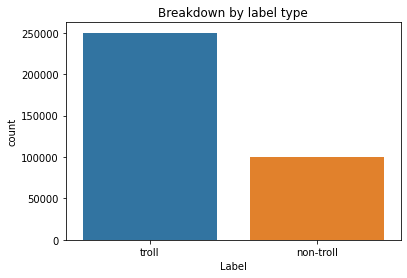

In [0]:
import seaborn as sns
sns.countplot(data.label)
plt.xlabel('Label')
plt.title('Breakdown by label type')

In [0]:
maxlen = 150
token = Tokenizer()
token.fit_on_texts(data['content'])
sequences = token.texts_to_sequences(train_x)
padded = sequence.pad_sequences(sequences, maxlen=maxlen,padding="post")

In [7]:
vocab_size = len(token.word_index)+1
print(vocab_size)
print(np.shape(padded),np.shape(train_y))

406636
(315000, 150) (315000,)


In [0]:
embedding_index = dict()
f = open('/content/drive/My Drive/glove.twitter.27B.50d.txt',encoding='utf-8')

In [0]:
for line in f:
    values = line.split(" ")
    word = values[0]
    coef = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coef

In [0]:
embedding_matrix = np.zeros((vocab_size,50))

In [0]:
for word,i in token.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [12]:
print(np.shape(embedding_matrix))

(406636, 50)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle


def make_rnn():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size ,50,weights=[embedding_matrix],input_length=maxlen,mask_zero=True)(inputs)
    layer = LSTM(100)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.1)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model = make_rnn()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.0001),metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           20331800  
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               25856     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [16]:
history = model.fit(padded,np.asarray(train_y),batch_size=128,epochs=9,validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 283500 samples, validate on 31500 samples
Epoch 1/9
283500/283500 [==============================] - 827s 3ms/step - loss: 0.2984 - accuracy: 0.8670 - val_loss: 0.2591 - val_accuracy: 0.8871
Epoch 2/9
283500/283500 [==============================] - 785s 3ms/step - loss: 0.2451 - accuracy: 0.8922 - val_loss: 0.2360 - val_accuracy: 0.8982
Epoch 3/9
283500/283500 [==============================] - 784s 3ms/step - loss: 0.2281 - accuracy: 0.9011 - val_loss: 0.2240 - val_accuracy: 0.9042
Epoch 4/9
283500/283500 [==============================] - 813s 3ms/step - loss: 0.2174 - accuracy: 0.9061 - val_loss: 0.2175 - val_accuracy: 0.9057
Epoch 5/9
283500/283500 [==============================] - 804s 3ms/step - loss: 0.2103 - accuracy: 0.9091 - val_loss: 0.2118 - val_accuracy: 0.9087
Epoch 6/9
283500/283500 [==============================] - 798s 3ms/step - loss: 0.2047 - accuracy: 0.9118 - val_loss: 0.2080 - val_accuracy: 0.9112
Epoch 7/9
283500/283500 [==============================

In [0]:
with open ("/content/drive/My Drive/test_x.txt", "r",newline='') as myfile:
    test_x = myfile.readlines()

with open ("/content/drive/My Drive/test_y.txt", "r",newline='') as myfile:
    test_y = myfile.readlines()


In [18]:
test_sequences = token.texts_to_sequences(test_x)
test_padded = sequence.pad_sequences(test_sequences,maxlen=maxlen)

accuracy = model.evaluate(test_padded, np.asarray(test_y))
print('Test loss: ', accuracy[0])
print('Test accuracy: ', accuracy[1])

35000/35000 [==============================] - 53s 2ms/step
Test loss:  0.22134390973874501
Test accuracy:  0.9055142998695374


after 9 epochs


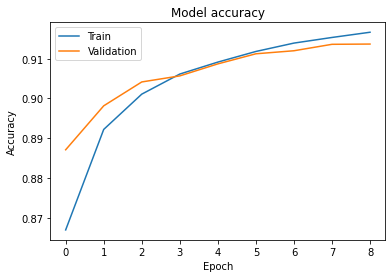

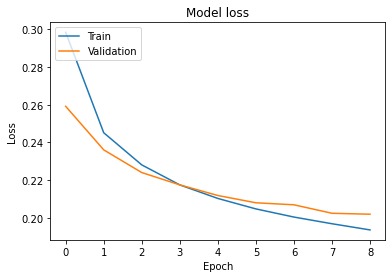

In [19]:

print("after 9 epochs")
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [0]:
model.save("final_287_bestmodel.h5")

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_padded)
print(y_pred)
# results = confusion_matrix(np.asarray(test_y), y_pred.round()) 
# print(results)

KeyboardInterrupt: ignored

In [28]:
from sklearn.metrics import classification_report
# classification_report(np.asarray(test_y), y_pred.round()) 

ValueError: ignored

In [20]:


print(np.shape(test_y))
print(np.shape(test_x))




(35000,)
(35000,)


In [0]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(train_x)
x_test_tfidf = tfidf.transform(test_x)
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_y)
y_test = encoder.transform(test_y)


In [22]:
best_f1 = 0
best_accuracy = 0
best_c = 0

for i in [0.001,0.1,1,10,15,100]:
    
    lr=LogisticRegression(C=i)
    lr.fit(x_train_tfidf,y_train)
    
    y_pred=lr.predict(x_test_tfidf)    
    score=f1_score(y_test,y_pred,average = 'macro')
    accuracy=accuracy_score(y_test,y_pred)
    
    if(score>best_f1):
        best_f1=score
        best_accuracy=accuracy
        best_c = i
        
print("best f1: ",best_f1)
print("best accuracy: ",best_accuracy)
print("best c: ",best_c)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


best f1:  0.774079927449207
best accuracy:  0.8423142857142857
best c:  100


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
